In [179]:
import math
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
print('done')

done


In [180]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [181]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [183]:

df.drop(['embarked', 'class', 'alive'], axis = 1, inplace=True)

In [184]:
#exploratory data analysis
#see number of missing values
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
    

In [185]:
null_num

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [186]:
pd.DataFrame(null_num, index = df.columns, columns = ['Total Missing Values'])

,Total Missing Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


<Axes: xlabel='deck', ylabel='count'>

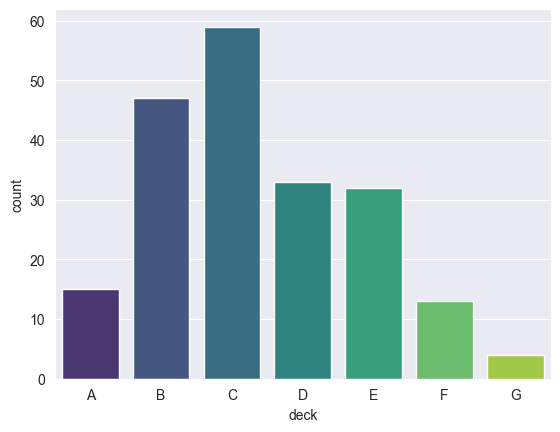

In [187]:
sns.set_style('darkgrid')
sns.countplot(x = 'deck', data = df, palette = 'viridis')


<Axes: xlabel='deck', ylabel='count'>

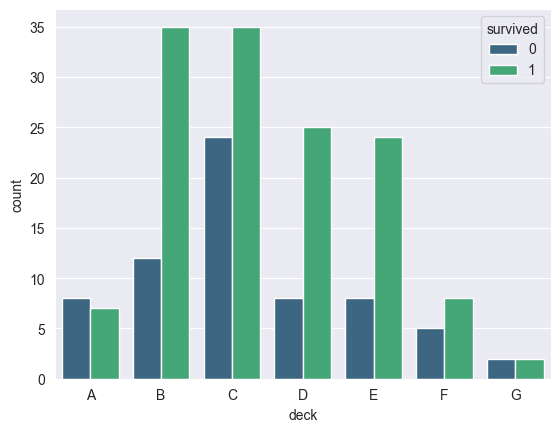

In [188]:
sns.set_style('darkgrid')
sns.countplot(x = 'deck', hue = 'survived', data = df, palette = 'viridis')


In [189]:
df.drop(['deck'], axis=1, inplace=True)

<Axes: xlabel='pclass', ylabel='age'>

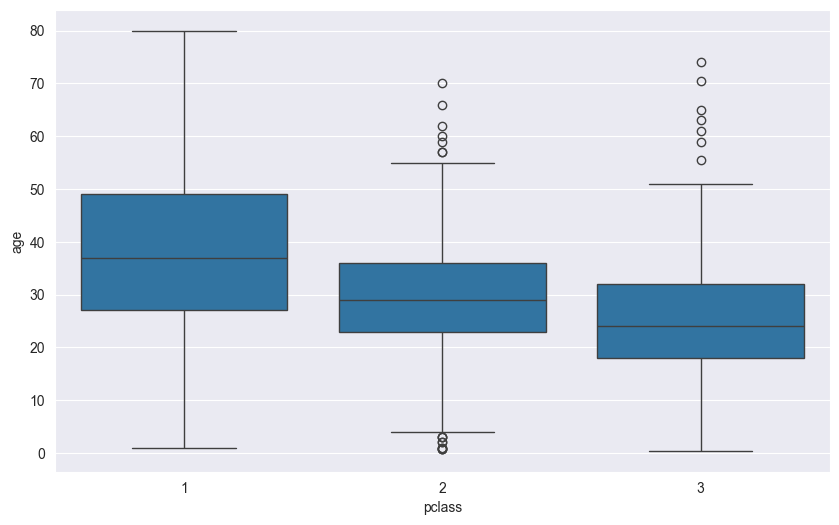

In [190]:
#age distribution by class 
plt.figure(figsize=(10,6))
sns.boxplot(x='pclass', y = "age", data=df)

In [191]:

def fillna_age(columns):
    age = columns[0]
    pclass = columns[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 23
    else:
        return age 
        

In [192]:

df.age = df[["age", "pclass"]].apply(fillna_age, axis = 1)


In [193]:

df.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    23.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [194]:
df.dropna(inplace=True)

In [195]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

pd.DataFrame(null_num, index=df.columns, columns=['Total Missing Values'])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0


<Axes: xlabel='survived', ylabel='count'>

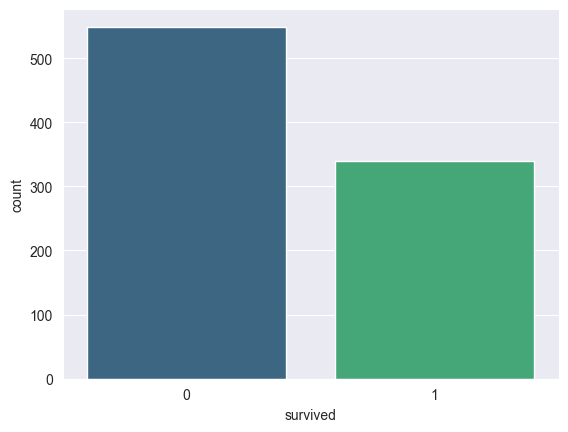

In [196]:
sns.set_style('darkgrid')
sns.countplot(x = 'survived', data = df, palette = 'viridis')


In [197]:
df.survived.value_counts()

survived
0    549
1    340
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

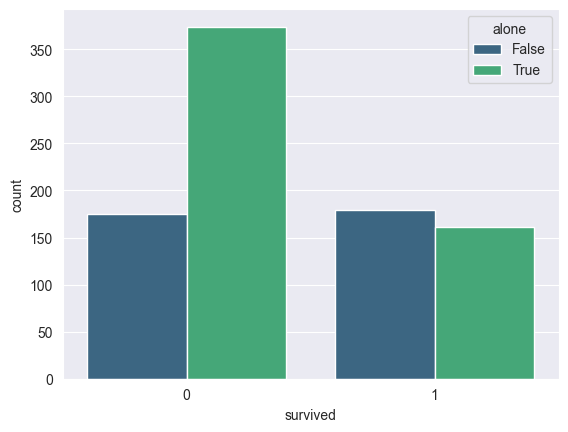

In [198]:
#are there any factors that affect the survival of passengers?
sns.set_style('darkgrid')
sns.countplot(x = 'survived', hue = 'alone', data = df, palette = 'viridis')

<Axes: xlabel='survived', ylabel='count'>

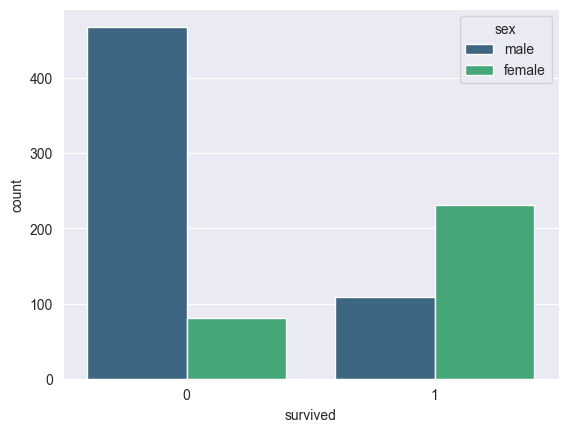

In [199]:
sns.set_style('darkgrid')
sns.countplot(x = 'survived', hue = 'sex', data = df, palette = 'viridis')

<Axes: xlabel='survived', ylabel='count'>

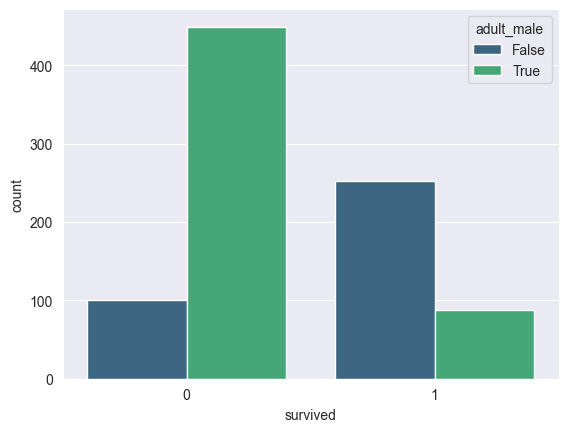

In [200]:
sns.set_style('darkgrid')
sns.countplot(x = 'survived', hue = 'adult_male', data = df, palette = 'viridis')

<Axes: xlabel='survived', ylabel='count'>

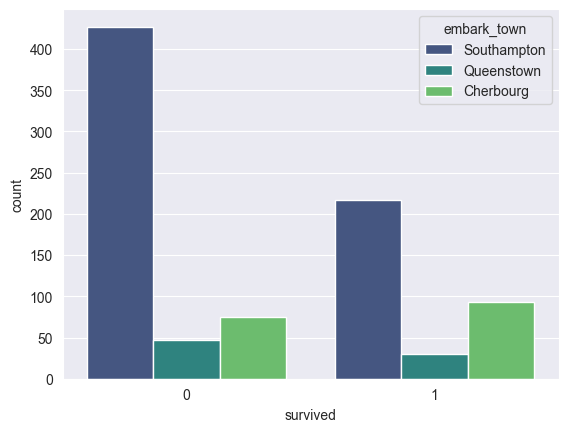

In [201]:
sns.set_style('darkgrid')
sns.countplot(x = 'survived', hue = 'embark_town', data = df, palette = 'viridis')

In [202]:
df.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

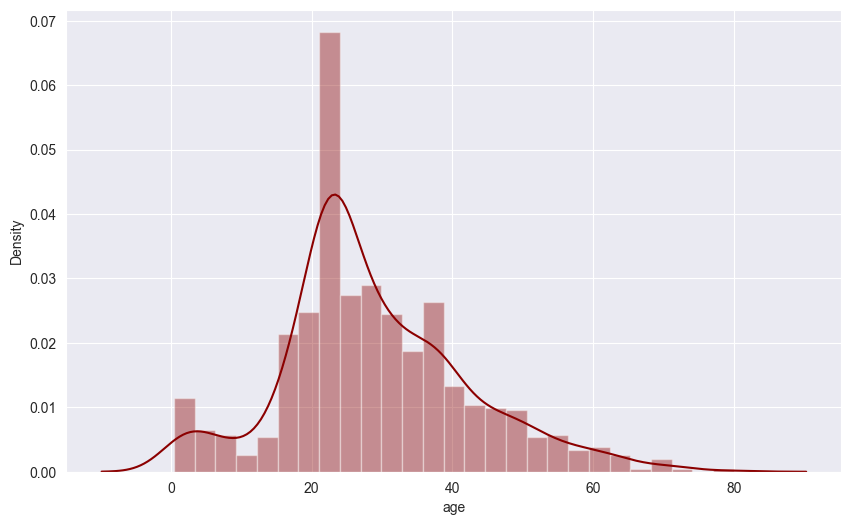

In [203]:
plt.figure(figsize=(10,6))
sns.distplot(df['age'], color='darkred')

<Axes: xlabel='fare', ylabel='Density'>

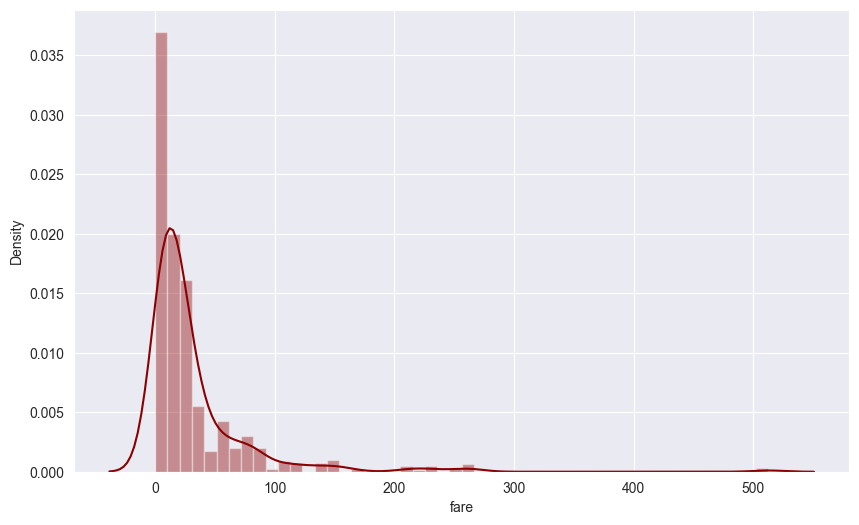

In [204]:
plt.figure(figsize=(10,6))
sns.distplot(df['fare'], color='darkred')

<Axes: >

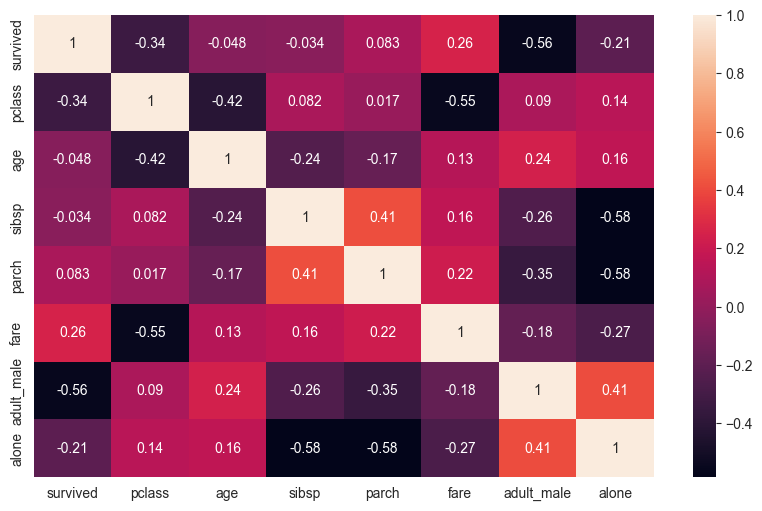

In [205]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot = True)

In [206]:
df.drop(["age", "sibsp", "parch"], axis = 1, inplace=True)

In [207]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone
0,0,3,male,7.2500,man,True,Southampton,False
1,1,1,female,71.2833,woman,False,Cherbourg,False
2,1,3,female,7.9250,woman,False,Southampton,True
3,1,1,female,53.1000,woman,False,Southampton,False
4,0,3,male,8.0500,man,True,Southampton,True


In [208]:
sex = pd.get_dummies(df['sex'], drop_first =True, dtype=int)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [209]:
who = pd.get_dummies(df['who'], drop_first =True, dtype=int)
adult_male = pd.get_dummies(df['adult_male'], drop_first =True, dtype=int)
embark_town = pd.get_dummies(df['embark_town'], drop_first =True, dtype=int)
alone =  pd.get_dummies(df['alone'], drop_first =True, dtype=int)

In [210]:
who

,man,woman
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
886,1,0
887,0,1
888,0,1
889,1,0


In [211]:
#axis 1 = concatenate on column basis
df = pd.concat([df, sex, who, adult_male, embark_town, alone], axis=1)
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone,male,man,woman,True,Queenstown,Southampton,True
0,0,3,male,7.2500,man,True,Southampton,False,1,1,0,1,0,1,0
1,1,1,female,71.2833,woman,False,Cherbourg,False,0,0,1,0,0,0,0
2,1,3,female,7.9250,woman,False,Southampton,True,0,0,1,0,0,1,1
3,1,1,female,53.1000,woman,False,Southampton,False,0,0,1,0,0,1,0
4,0,3,male,8.0500,man,True,Southampton,True,1,1,0,1,0,1,1


In [212]:
df.drop(['sex', 'who', 'adult_male', 'embark_town', 'alone'], axis=1, inplace=True)


In [213]:
df.head()

,survived,pclass,fare,male,man,woman,True,Queenstown,Southampton,True
0,0,3,7.2500,1,1,0,1,0,1,0
1,1,1,71.2833,0,0,1,0,0,0,0
2,1,3,7.9250,0,0,1,0,0,1,1
3,1,1,53.1000,0,0,1,0,0,1,0
4,0,3,8.0500,1,1,0,1,0,1,1


In [214]:
#create log reg model
#divide data into test and train
from sklearn.model_selection import train_test_split


In [216]:
X = df.drop("survived", axis=1)

#predicted variable
y = df['survived']

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [218]:
X_train

,pclass,fare,male,man,woman,True,Queenstown,Southampton,True
376,3,7.2500,0,0,1,0,0,1,1
458,2,10.5000,0,0,1,0,0,1,1
732,2,0.0000,1,1,0,1,0,1,1
507,1,26.5500,1,1,0,1,0,1,1
830,3,14.4542,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
107,3,7.7750,1,1,0,1,0,1,1
271,3,0.0000,1,1,0,1,0,1,1
862,1,25.9292,0,0,1,0,0,1,1
436,3,34.3750,0,0,1,0,0,1,0


In [221]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [225]:
#train model 
X_train.columns = X_train.columns.astype(str)
y_train = y_train.astype(str)

lr_model.fit(X_train, y_train)

LogisticRegression()

In [227]:
X_test.columns = X_test.columns.astype(str)
y_test = y_test.astype(str)


y_pred = lr_model.predict(X_test)

In [229]:
#confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [230]:
print(classification_report(y_test, y_pred))

#good f1 score value 

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       141
           1       0.68      0.79      0.73        82

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.79      0.79       223



In [232]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

#type 1 = 30 = false positive
#type 2 = 17 = negative value of false = more critical than type 1


array([[111,  30],
       [ 17,  65]], dtype=int64)